# Helper Functions

In [ ]:
def create_model(model_url, num_classes=10):
  """
  Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """

  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name="feature_extraction_layer",
                                           input_shape=IMAGE_SHAPE+(3,))
  model = tf_keras.Sequential([
    feature_extractor_layer,
    tf_keras.layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])

  return model

In [ ]:
def preprocess_data_IDG(train_dir, test_dir, img_size):
  from tensorflow.keras.preprocessing.image import ImageDataGenerator

  train_datagen = ImageDataGenerator(rescale=1/255.)
  test_datagen = ImageDataGenerator(rescale=1/255.)

  train_data = train_datagen.flow_from_directory(train_dir,
                                                 target_size=img_size,
                                                 class_mode = "categorical",
                                                 seed = 42)
  test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=img_size,
                                               class_mode = "categorical",
                                               seed = 42,
                                               shuffle=False)
  return train_data, test_data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for array operations

def visualize_data(data):
    """Visualizes images and their labels from a data generator.

    Args:
        data: A Keras ImageDataGenerator DirectoryIterator.
    """

    class_names = data.class_indices
    class_names = {value: key for key, value in class_names.items()}

    # Get a single batch of data
    images, labels = next(data)

    plt.figure(figsize=(12, 8))
    for i in range(16):
      plt.subplot(4, 4, i+1)
      plt.imshow(images[i])
      label_index = np.argmax(labels[i])
      plt.title(class_names[label_index])
      plt.axis("off")

    plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history, title):
  """Plots training curves for a keras model.

  Args:
    history: A History object returned from model.fit.
    title: The title of the plot.
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  fig, axes = plt.subplots(1, 2, figsize=(15, 7))  # Create figure and axes
  fig.suptitle(title)  # Set the title at the top

  axes[0].plot(epochs, loss, label="training_loss")
  axes[0].plot(epochs, val_loss, label="val_loss")
  axes[0].set_ylabel("Loss")
  axes[0].set_xlabel("Epochs")
  axes[0].legend()

  axes[1].plot(epochs, accuracy, label="training_accuracy")
  axes[1].plot(epochs, val_accuracy, label="val_accuracy")
  axes[1].set_ylabel("Accuracy")
  axes[1].set_xlabel("Epochs")
  axes[1].legend()

  plt.show()

# Get the data 10% of data 10 classes

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-11-11 12:01:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.27, 172.217.0.91, 172.217.7.59, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  95.7MB/s    in 1.7s    

2024-11-11 12:01:03 (95.7 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
data_dir = "10_food_classes_10_percent"
import pathlib
data_dir = pathlib.Path(data_dir)
train_dir = data_dir / "train"
test_dir = data_dir / "test"
data_dir, train_dir, test_dir

(PosixPath('10_food_classes_10_percent'),
 PosixPath('10_food_classes_10_percent/train'),
 PosixPath('10_food_classes_10_percent/test'))

In [ ]:
train_data, test_data = preprocess_data_IDG(train_dir, test_dir, (224, 224))

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
len(train_data), len(test_data)

(24, 79)

In [ ]:
z = train_data.class_indices

In [ ]:
{value: key for key, value in z.items()}

{0: 'chicken_curry',
 1: 'chicken_wings',
 2: 'fried_rice',
 3: 'grilled_salmon',
 4: 'hamburger',
 5: 'ice_cream',
 6: 'pizza',
 7: 'ramen',
 8: 'steak',
 9: 'sushi'}

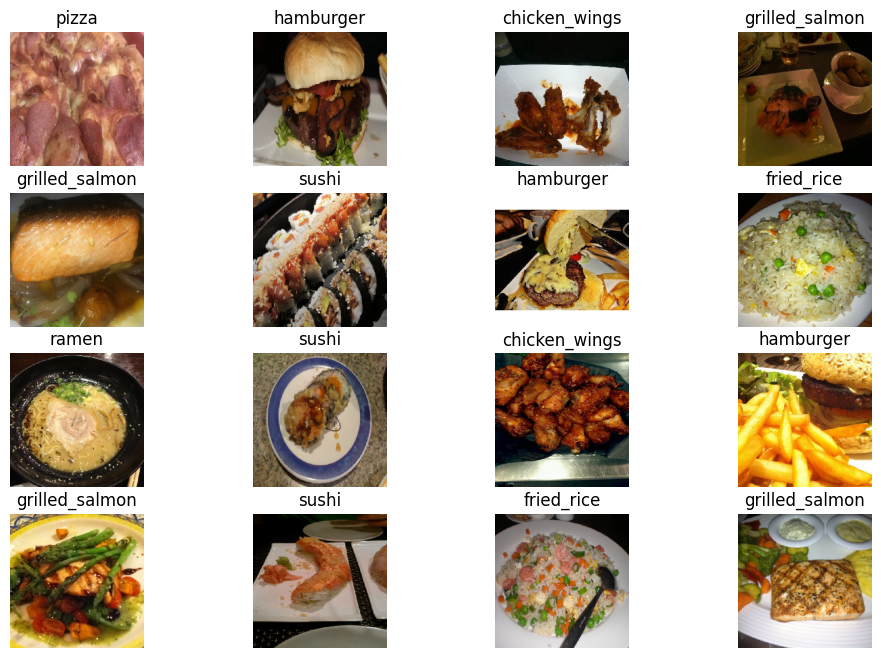

In [ ]:
import matplotlib.pyplot as plt
visualize_data(train_data)

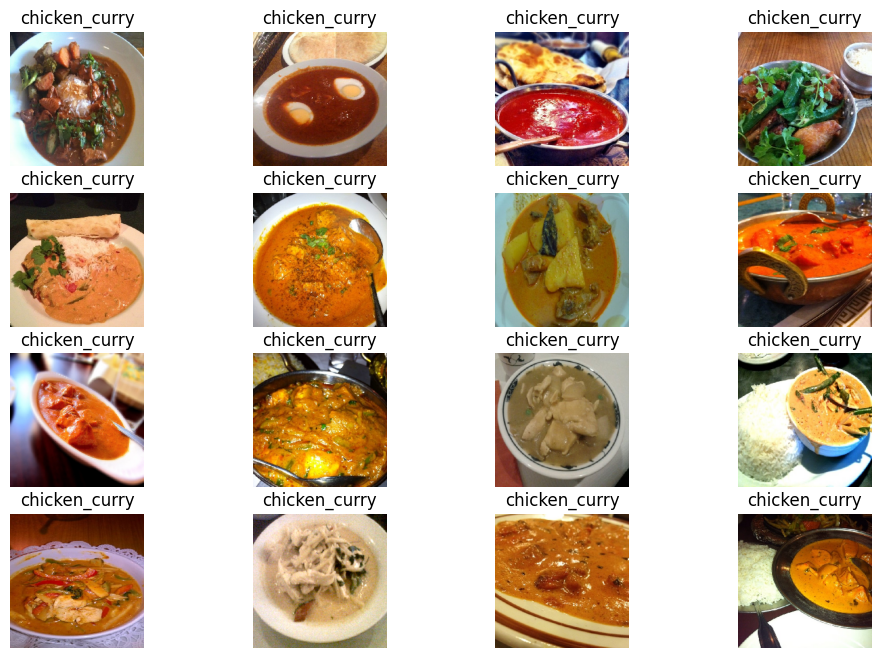

In [ ]:
visualize_data(test_data)

# Feature Extraction

## Sequential API Model's

In [ ]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
import tf_keras
import tensorflow_hub as hub

IMAGE_SHAPE = (224, 224)

### Model_0 Resnet

In [ ]:
model_0 = create_model(resnet_url, num_classes=train_data.num_classes)

model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
model_0.compile(loss = tf_keras.losses.CategoricalCrossentropy(),
                optimizer = tf_keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_0 = model_0.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = int(0.25 * len(test_data)))

Epoch 1/5
24/24 [==============================] - 281s 12s/step - loss: 1.9747 - accuracy: 0.3173 - val_loss: 1.6244 - val_accuracy: 0.4359
Epoch 2/5
24/24 [==============================] - 257s 11s/step - loss: 0.9135 - accuracy: 0.7267 - val_loss: 0.9416 - val_accuracy: 0.6875
Epoch 3/5
24/24 [==============================] - 275s 12s/step - loss: 0.6220 - accuracy: 0.8320 - val_loss: 0.4633 - val_accuracy: 0.8849
Epoch 4/5
24/24 [==============================] - 279s 12s/step - loss: 0.4791 - accuracy: 0.8747 - val_loss: 0.7687 - val_accuracy: 0.7328
Epoch 5/5
24/24 [==============================] - 250s 11s/step - loss: 0.3962 - accuracy: 0.9147 - val_loss: 0.7593 - val_accuracy: 0.7549


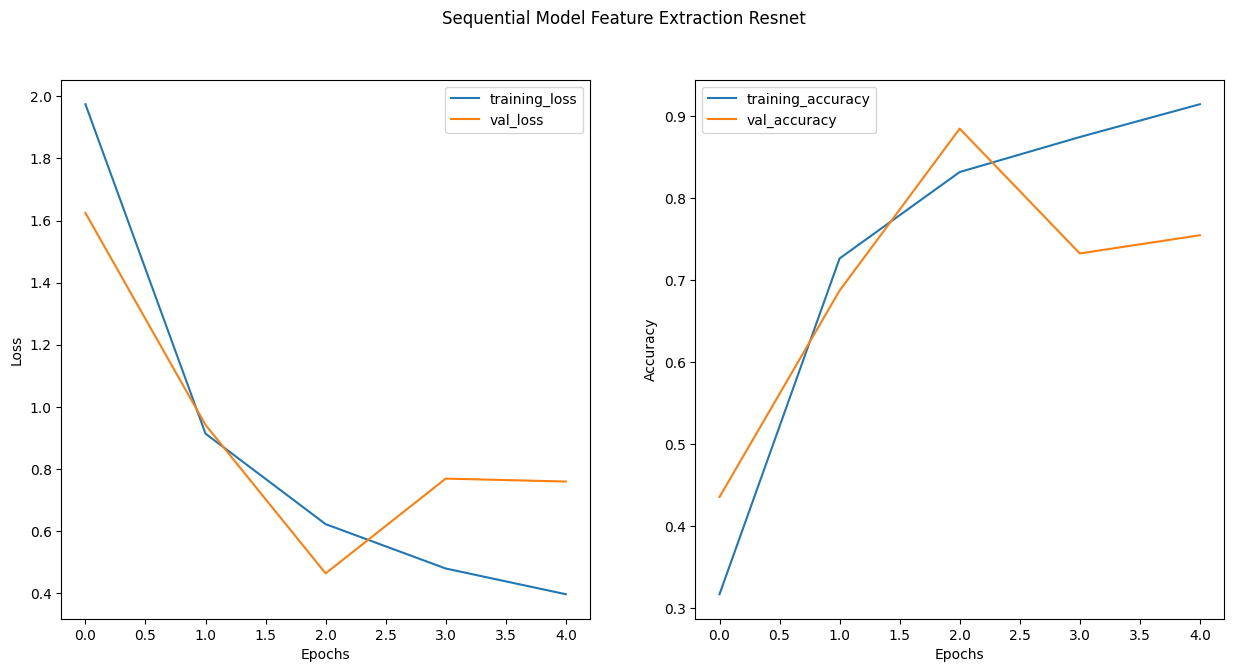

In [ ]:
plot_loss_curves(history_0, title="Sequential Model Feature Extraction Resnet")

In [ ]:
model_0_eval = model_0.evaluate(test_data, steps=len(test_data))
model_0_eval

79/79 [==============================] - 356s 4s/step - loss: 0.6947 - accuracy: 0.7712


[0.6947377920150757, 0.7712000012397766]

### Model_1 Efficientnet

In [ ]:
model_1 = create_model(efficientnet_url, num_classes=train_data.num_classes)
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              4049564   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062374 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


In [ ]:
model_1.compile(loss = tf_keras.losses.CategoricalCrossentropy(),
                optimizer = tf_keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = int(0.25 * len(test_data)))

Epoch 1/5
24/24 [==============================] - 150s 6s/step - loss: 1.8193 - accuracy: 0.4840 - val_loss: 1.1569 - val_accuracy: 0.8158
Epoch 2/5
24/24 [==============================] - 129s 6s/step - loss: 1.0263 - accuracy: 0.7880 - val_loss: 0.7362 - val_accuracy: 0.8635
Epoch 3/5
24/24 [==============================] - 158s 7s/step - loss: 0.7438 - accuracy: 0.8280 - val_loss: 0.8202 - val_accuracy: 0.7724
Epoch 4/5
24/24 [==============================] - 87s 4s/step - loss: 0.6004 - accuracy: 0.8587 - val_loss: 0.6835 - val_accuracy: 0.8421
Epoch 5/5
24/24 [==============================] - 88s 4s/step - loss: 0.5043 - accuracy: 0.8933 - val_loss: 0.3709 - val_accuracy: 0.9194


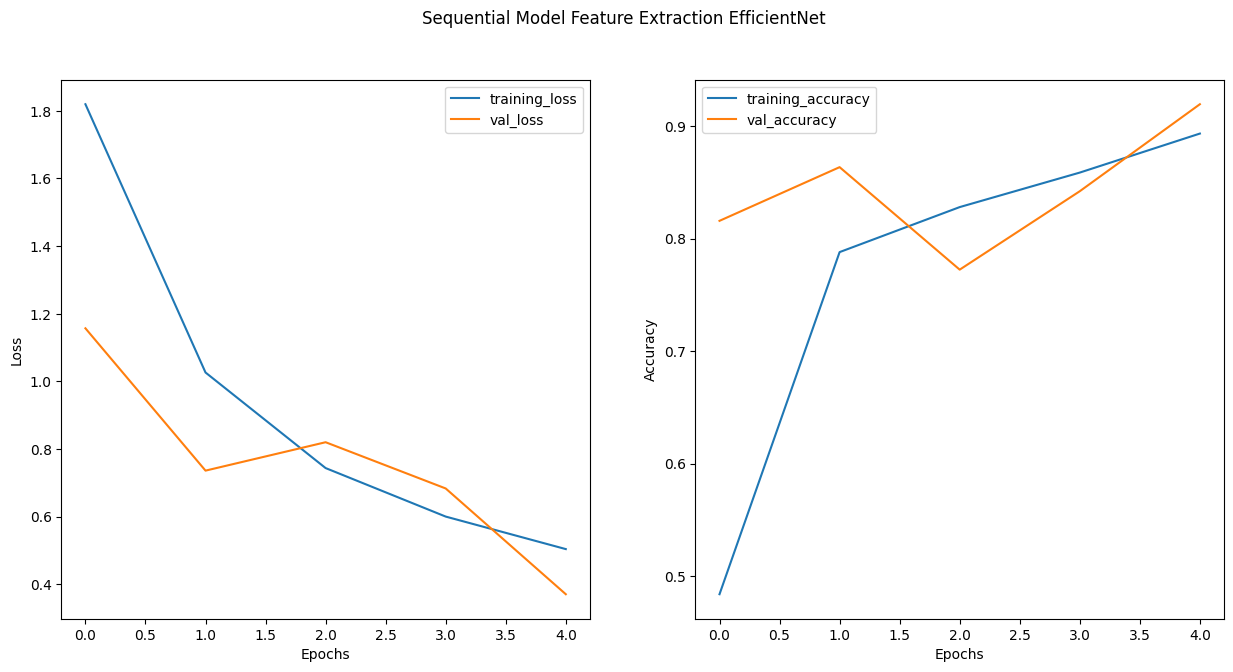

In [ ]:
plot_loss_curves(history_1, title="Sequential Model Feature Extraction EfficientNet")

In [ ]:
model_1_eval = model_1.evaluate(test_data, steps=len(test_data))
model_1_eval

79/79 [==============================] - 154s 2s/step - loss: 0.5434 - accuracy: 0.8636


[0.5434346199035645, 0.8636000156402588]

## Building Models by Functional

In [ ]:
resnet_model = tf_keras.applications.ResNet50(include_top=False,)
efficientnet_v2_model = tf_keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

In [ ]:
resnet_model.trainable = False
efficientnet_v2_model.trainable = False

### Model_2 Resnet Model

In [ ]:
base_model = resnet_model
input = tf_keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = base_model(input)
x = tf_keras.layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x)
output = tf_keras.layers.Dense(train_data.num_classes, activation=tf_keras.activations.softmax, name="output_layer")(x)

model_2 = tf_keras.Model(input, output)
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 global_avg_pooling_layer (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23608202 (90.06 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
model_2.compile(loss = tf_keras.losses.CategoricalCrossentropy(),
                optimizer = tf_keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25*len(test_data)))

Epoch 1/5
24/24 [==============================] - 239s 10s/step - loss: 62.4010 - accuracy: 0.0987 - val_loss: 38.3237 - val_accuracy: 0.0000e+00
Epoch 2/5
24/24 [==============================] - 271s 12s/step - loss: 23.3396 - accuracy: 0.0853 - val_loss: 14.5512 - val_accuracy: 0.0000e+00
Epoch 3/5
24/24 [==============================] - 270s 12s/step - loss: 19.6688 - accuracy: 0.0973 - val_loss: 7.8124 - val_accuracy: 0.0000e+00
Epoch 4/5
24/24 [==============================] - 270s 12s/step - loss: 14.6580 - accuracy: 0.0947 - val_loss: 14.2187 - val_accuracy: 0.0000e+00
Epoch 5/5
24/24 [==============================] - 233s 10s/step - loss: 11.5565 - accuracy: 0.1013 - val_loss: 7.9586 - val_accuracy: 0.0000e+00


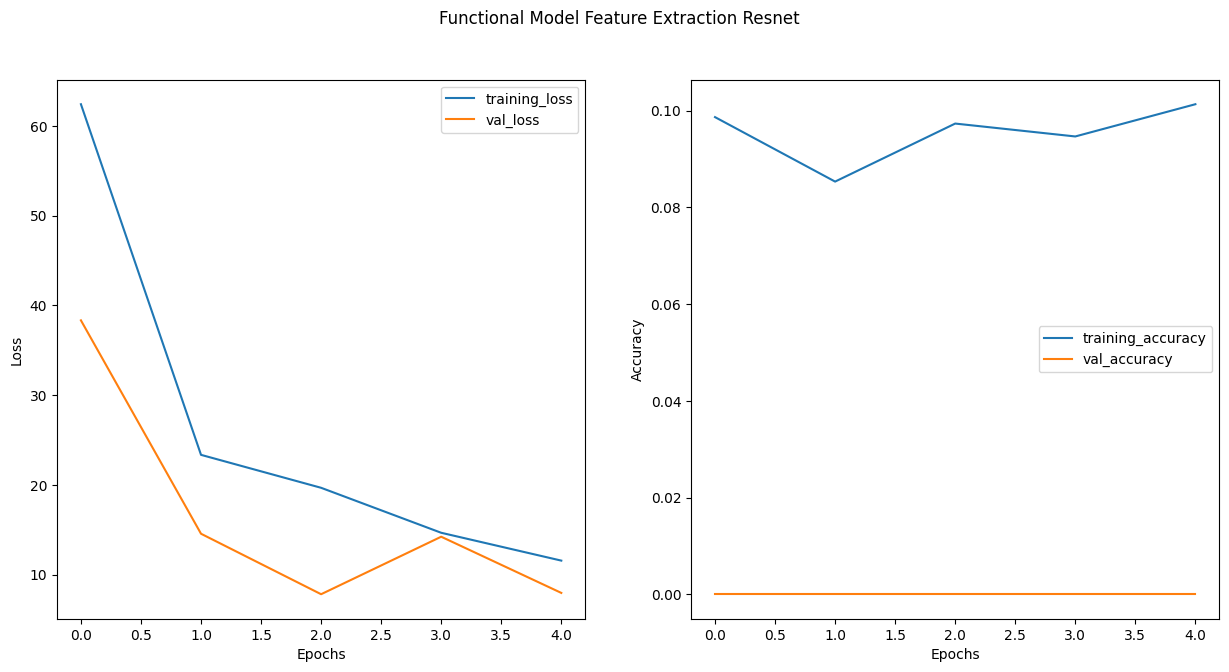

In [ ]:
plot_loss_curves(history_2, title="Functional Model Feature Extraction Resnet")

In [ ]:
model_2_eval = model_2.evaluate(test_data, steps=len(test_data))
model_2_eval

79/79 [==============================] - 431s 5s/step - loss: 6.0760 - accuracy: 0.1000


[6.07603645324707, 0.10000000149011612]

### Model_3 Efficientnet

In [ ]:
base_model = efficientnet_v2_model
input = tf_keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = base_model(input)
x = tf_keras.layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x)
output = tf_keras.layers.Dense(train_data.num_classes, activation=tf_keras.activations.softmax, name="output_layer")(x)

model_3 = tf_keras.Model(input, output)
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_avg_pooling_layer (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


In [ ]:
model_3.compile(loss = tf_keras.losses.CategoricalCrossentropy(),
                optimizer = tf_keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = int(0.25 * len(test_data)))

Epoch 1/5
24/24 [==============================] - 87s 3s/step - loss: 2.3372 - accuracy: 0.1107 - val_loss: 2.3635 - val_accuracy: 0.0000e+00
Epoch 2/5
24/24 [==============================] - 64s 3s/step - loss: 2.3410 - accuracy: 0.0787 - val_loss: 2.4533 - val_accuracy: 0.0000e+00
Epoch 3/5
24/24 [==============================] - 77s 3s/step - loss: 2.3395 - accuracy: 0.0960 - val_loss: 2.5580 - val_accuracy: 0.0000e+00
Epoch 4/5
24/24 [==============================] - 76s 3s/step - loss: 2.3476 - accuracy: 0.0827 - val_loss: 2.3272 - val_accuracy: 0.3026
Epoch 5/5
24/24 [==============================] - 63s 3s/step - loss: 2.3249 - accuracy: 0.1040 - val_loss: 2.2970 - val_accuracy: 0.0000e+00


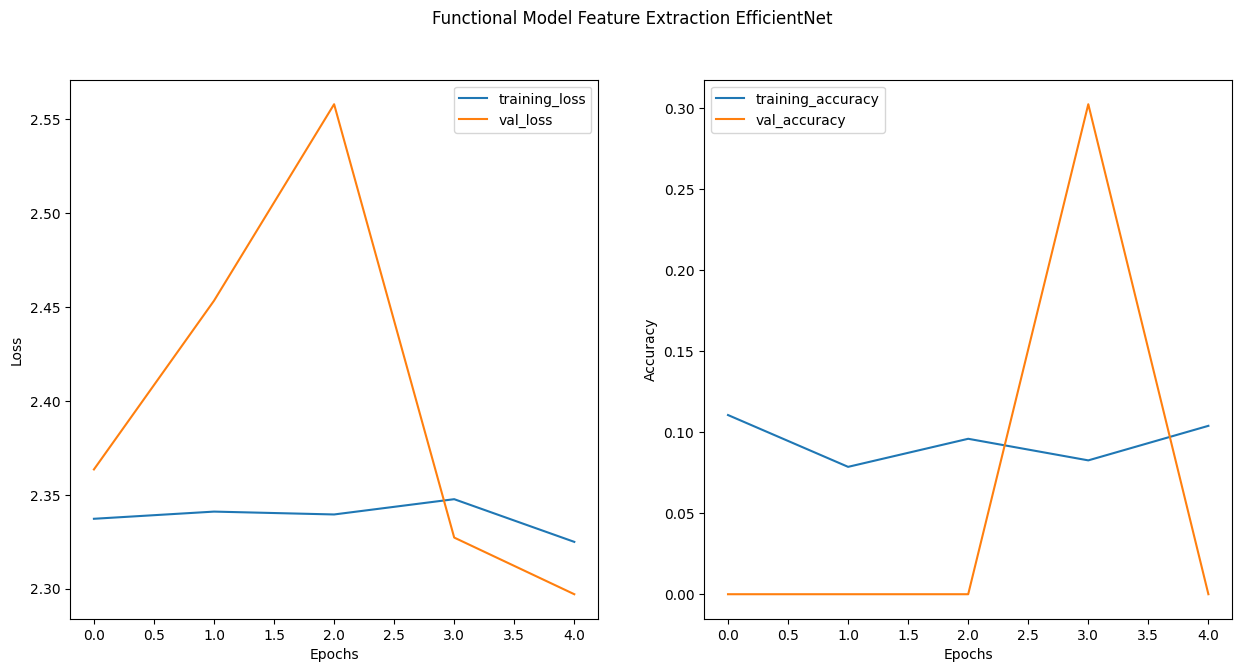

In [ ]:
plot_loss_curves(history_3, title="Functional Model Feature Extraction EfficientNet")

In [ ]:
model_3_eval = model_3.evaluate(test_data, steps=len(test_data))
model_3_eval

79/79 [==============================] - 118s 1s/step - loss: 2.3318 - accuracy: 0.1000


[2.331829309463501, 0.10000000149011612]

In [ ]:
FE_model_metrics = {}
FE_model_metrics["Resnet"] = model_0_eval
FE_model_metrics["EfficientNet"] = model_1_eval
FE_model_metrics["Resnet_Functional"] = model_2_eval
FE_model_metrics["EfficientNet_Functional"] = model_3_eval
FE_model_metrics

{'Resnet': [0.6947377920150757, 0.7712000012397766],
 'EfficientNet': [0.5434346199035645, 0.8636000156402588],
 'Resnet_Functional': [6.07603645324707, 0.10000000149011612],
 'EfficientNet_Functional': [2.331829309463501, 0.10000000149011612]}

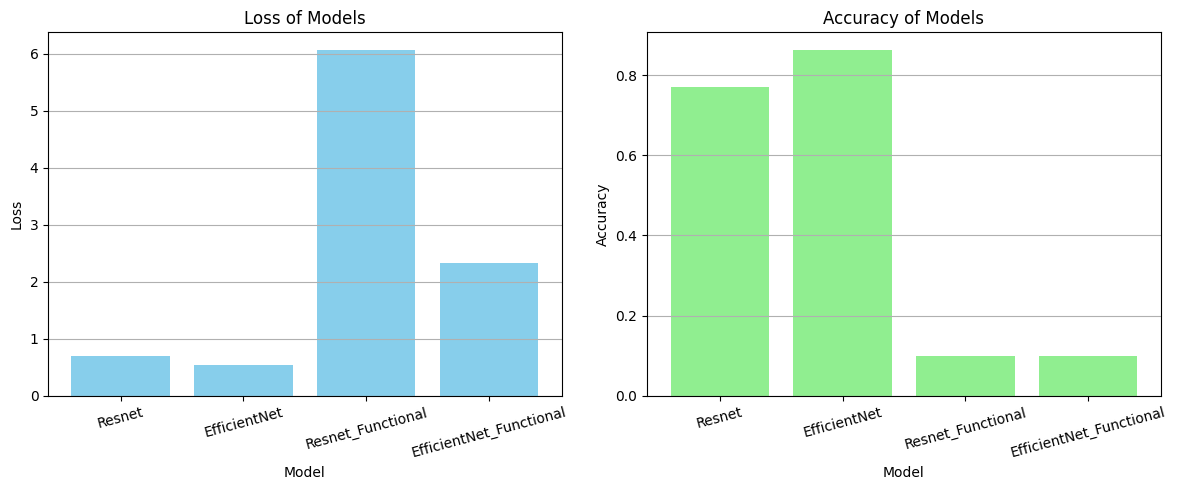

In [ ]:
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt

# Split data into loss and accuracy
loss_data = {model: metrics[0] for model, metrics in FE_model_metrics.items()}
accuracy_data = {model: metrics[1] for model, metrics in FE_model_metrics.items()}

# Convert to DataFrames
df_loss = pd.DataFrame(list(loss_data.items()), columns=['Model', 'Loss'])
df_accuracy = pd.DataFrame(list(accuracy_data.items()), columns=['Model', 'Accuracy'])

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(df_loss['Model'], df_loss['Loss'], color='skyblue')
plt.title('Loss of Models')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.xticks(rotation=15)
plt.grid(axis='y')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.bar(df_accuracy['Model'], df_accuracy['Accuracy'], color='lightgreen')
plt.title('Accuracy of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.grid(axis='y')

# Show the plots
plt.tight_layout()
plt.show()


# Transfer Learning - Fine Tuning

In [ ]:
import tf_keras
IMG_SIZE = (224, 224)

train_data = tf_keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode = "categorical",
                                                                 batch_size = 32,
                                                                 image_size = IMG_SIZE)

test_data = tf_keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                batch_size = 32,
                                                                image_size = IMG_SIZE,)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
data_augmentation = tf_keras.Sequential([
    tf_keras.layers.RandomFlip("horizontal"),
    tf_keras.layers.RandomRotation(0.2),
    tf_keras.layers.RandomZoom(0.2),
    tf_keras.layers.RandomHeight(0.2),
    tf_keras.layers.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
])

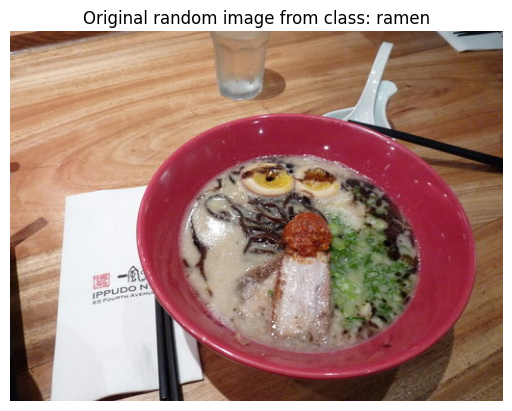

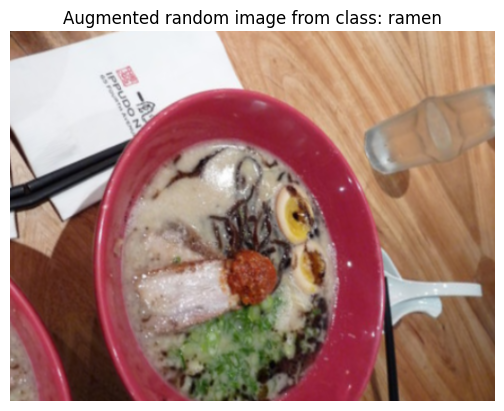

In [ ]:

# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import tensorflow as tf

target_class = random.choice(train_data.class_names) # choose a random class
target_dir = "/content/10_food_classes_10_percent/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation_resnet(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);


In [ ]:
input_size = (224, 224, 3)
base_model = tf_keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

In [ ]:
IMG_SIZE, IMG_SIZE+(3,)

((224, 224), (224, 224, 3))

In [ ]:
input  = tf_keras.layers.Input(shape=IMG_SIZE+(3,), name="input_layer")
x = data_augmentation(input)
x = base_model(x, training=False)
x = tf_keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
output = tf_keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_4 = tf_keras.Model(input, output)
model_4.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, None, None, 3)     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [ ]:
model_4.compile(loss = tf_keras.losses.CategoricalCrossentropy(),
                optimizer = tf_keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = int(0.25 * len(test_data)))

Epoch 1/5
24/24 [==============================] - 120s 5s/step - loss: 2.0239 - accuracy: 0.3093 - val_loss: 1.4859 - val_accuracy: 0.5905
Epoch 2/5
24/24 [==============================] - 80s 3s/step - loss: 1.4096 - accuracy: 0.6360 - val_loss: 1.0526 - val_accuracy: 0.7270
Epoch 3/5
24/24 [==============================] - 75s 3s/step - loss: 1.1070 - accuracy: 0.7187 - val_loss: 0.8491 - val_accuracy: 0.7780
Epoch 4/5
24/24 [==============================] - 74s 3s/step - loss: 0.9482 - accuracy: 0.7533 - val_loss: 0.7306 - val_accuracy: 0.7993
Epoch 5/5
24/24 [==============================] - 86s 4s/step - loss: 0.8371 - accuracy: 0.7867 - val_loss: 0.6495 - val_accuracy: 0.8322


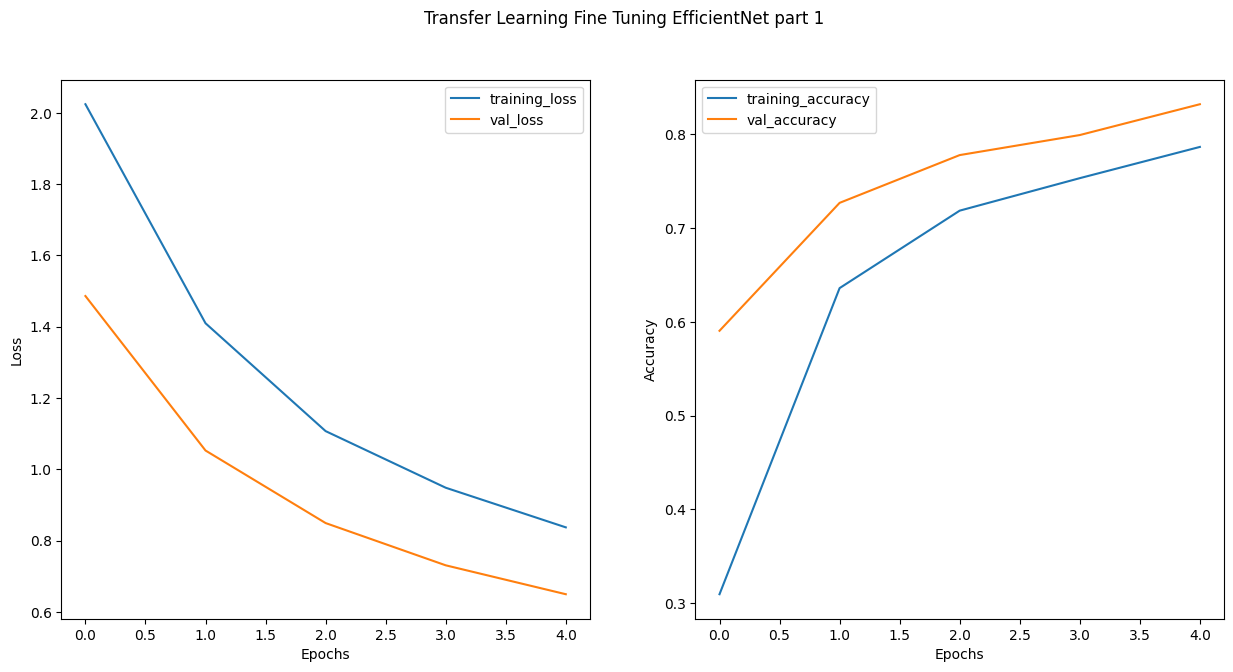

In [ ]:
plot_loss_curves(history_4, title="Transfer Learning Fine Tuning EfficientNet part 1")

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_5 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False

for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_5 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instance to store log files.
  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficient
    model_name) to create a pref

  Returns:
    TensorBoard callback.
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf_keras.callbacks.TensorBoard(
      log_dir=log_dir,
      # Add the following arguments for compatibility
      profile_batch=0,  # Disable profiling
      histogram_freq=0   # Disable histograms
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
initial_epochs = 5
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_4.fit(train_data,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_4.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")]) # name experiment appropriately


Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20241111-152114
Epoch 5/10
24/24 [==============================] - 93s 4s/step - loss: 0.7643 - accuracy: 0.8093 - val_loss: 0.6161 - val_accuracy: 0.8273
Epoch 6/10
24/24 [==============================] - 97s 4s/step - loss: 0.7059 - accuracy: 0.8213 - val_loss: 0.5892 - val_accuracy: 0.8322
Epoch 7/10
24/24 [==============================] - 73s 3s/step - loss: 0.6361 - accuracy: 0.8387 - val_loss: 0.5525 - val_accuracy: 0.8454
Epoch 8/10
24/24 [==============================] - 84s 4s/step - loss: 0.6077 - accuracy: 0.8480 - val_loss: 0.5169 - val_accuracy: 0.8454
Epoch 9/10
24/24 [==============================] - 89s 4s/step - loss: 0.5754 - accuracy: 0.8547 - val_loss: 0.4934 - val_accuracy: 0.8618
Epoch 10/10
24/24 [==============================] - 84s 4s/step - loss: 0.5636 - accuracy: 0.8533 - val_loss: 0.4633 - val_accuracy: 0.8569


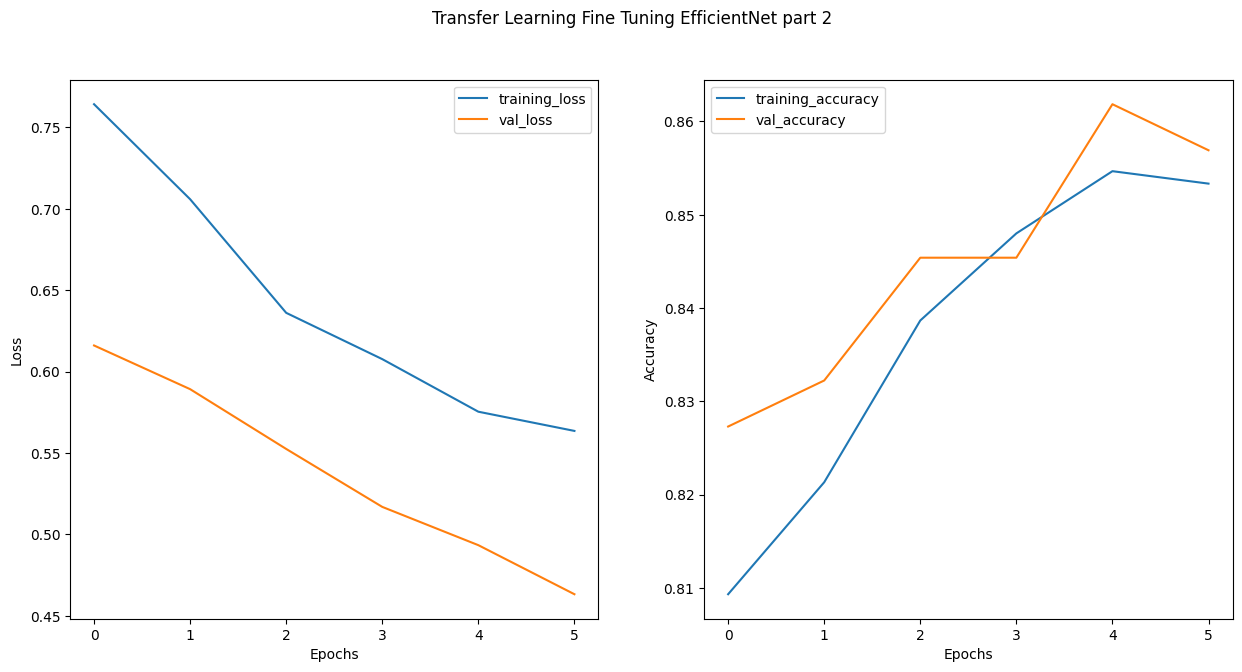

In [ ]:
plot_loss_curves(history_fine_10_percent_data_aug, title="Transfer Learning Fine Tuning EfficientNet part 2")

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
  """
  Compares two model history objects.
  """
  # Get original history measurements
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  print(len(acc))

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  # Combine original history with new history
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  print(len(total_acc))
  print(total_acc)
  # Make plots
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label='Training Accuracy')
  plt.plot(total_val_acc, label='Validation Accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1],
            plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label='Training Loss')
  plt.plot(total_val_loss, label='Validation Loss')
  plt.plot([initial_epochs-1, initial_epochs-1],
            plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()


5
11
[0.30933332443237305, 0.6359999775886536, 0.718666672706604, 0.753333330154419, 0.7866666913032532, 0.809333324432373, 0.8213333487510681, 0.8386666774749756, 0.8479999899864197, 0.8546666502952576, 0.8533333539962769]


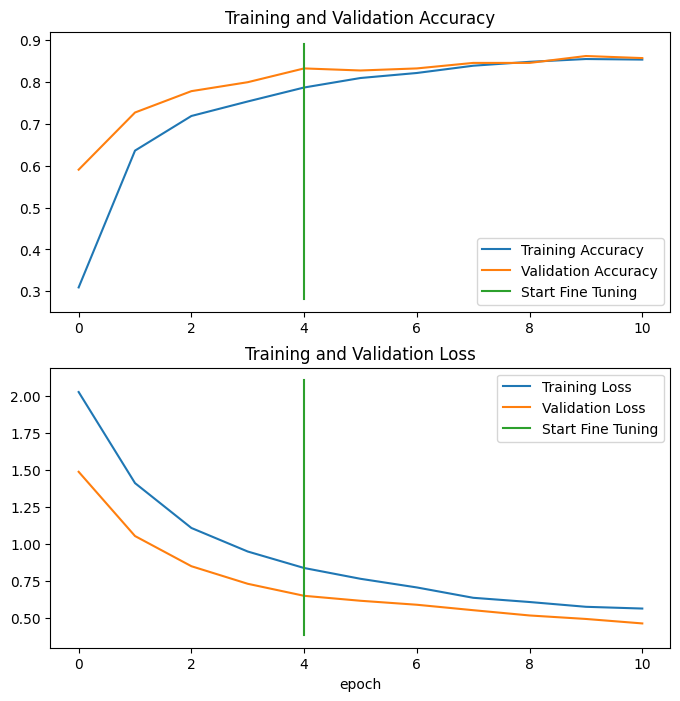

In [ ]:
compare_historys(history_4, history_fine_10_percent_data_aug)

# Get the data - 10% of data all classes

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-11-11 15:50:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.65.123, 172.217.15.251, 172.217.164.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.65.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  49.1MB/s    in 6.4s    

2024-11-11 15:51:01 (76.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import pathlib
data_dir = pathlib.Path("10_food_classes_all_data")
train_dir = data_dir / "train"
test_dir = data_dir / "test"
data_dir, train_dir, test_dir

(PosixPath('10_food_classes_all_data'),
 PosixPath('10_food_classes_all_data/train'),
 PosixPath('10_food_classes_all_data/test'))

In [ ]:
import os
classes = [i for i in os.listdir(train_dir)]
classes

['pizza',
 'sushi',
 'fried_rice',
 'grilled_salmon',
 'chicken_curry',
 'ice_cream',
 'ramen',
 'hamburger',
 'chicken_wings',
 'steak']

In [ ]:
for dirpath, dirnames, filenames in os.walk("/content/10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/10_food_classes_all_data'.
There are 10 directories and 0 images in '/content/10_food_classes_all_data/test'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/chicken_

In [ ]:
IMG_SIZE

(224, 224)

In [ ]:
train_data_all = tf_keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                     label_mode = "categorical",
                                                                     batch_size = 32,
                                                                     image_size = IMG_SIZE)
test_data_all = tf_keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                    label_mode = "categorical",
                                                                    batch_size = 32,
                                                                    image_size = IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_all.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

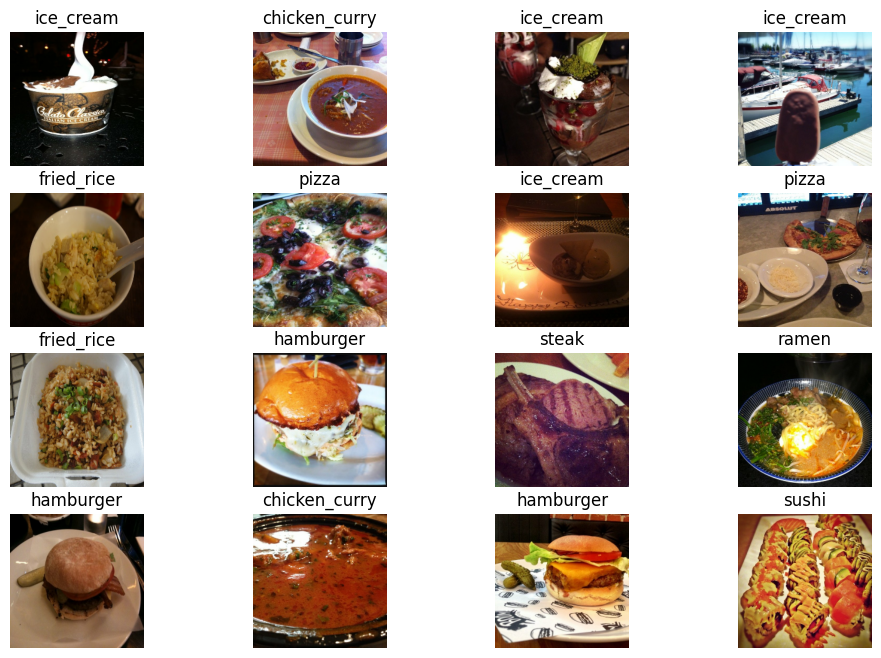

In [ ]:
# Get class names directly from the dataset
class_names = train_data_all.class_names

# Get a single batch of data
images, labels = next(iter(train_data_all))

plt.figure(figsize=(12, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    label_index = np.argmax(labels[i].numpy())
    plt.title(class_names[label_index])
    plt.axis("off")

plt.show()

## Fine Tuning Part - 1 Feature Extraction

In [ ]:
base_model = tf_keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

In [ ]:
input = tf_keras.layers.Input(shape=IMG_SIZE+(3,), name="input")
x = data_augmentation(input)
x = base_model(x, training=False)
x = tf_keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
output = tf_keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_5 = tf_keras.Model(input, output)
model_5.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, None, None, 3)     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [ ]:
model_5.compile(loss = tf_keras.losses.CategoricalCrossentropy(),
                optimizer = tf_keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
initial_epochs = 5
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

history_5_part_1 = model_5.fit(train_data_all,
                               epochs = initial_epochs,
                               steps_per_epoch = len(train_data_all),
                               validation_data = test_data_all,
                               validation_steps = int(0.25 * len(test_data_all)),
                               callbacks = [create_tensorboard_callback("transfer_learning_all_data_FE", "10_percent_fine_tune_last_10_all_FE")])

Saving TensorBoard log files to: transfer_learning_all_data_FE/10_percent_fine_tune_last_10_all_FE/20241111-162207
Epoch 1/5
235/235 [==============================] - 584s 2s/step - loss: 1.0807 - accuracy: 0.6816 - val_loss: 0.4743 - val_accuracy: 0.8651
Epoch 2/5
235/235 [==============================] - 487s 2s/step - loss: 0.6716 - accuracy: 0.7927 - val_loss: 0.3987 - val_accuracy: 0.8750
Epoch 3/5
235/235 [==============================] - 477s 2s/step - loss: 0.5935 - accuracy: 0.8167 - val_loss: 0.3631 - val_accuracy: 0.8766
Epoch 4/5
235/235 [==============================] - 480s 2s/step - loss: 0.5533 - accuracy: 0.8253 - val_loss: 0.3601 - val_accuracy: 0.8734
Epoch 5/5
235/235 [==============================] - 472s 2s/step - loss: 0.5139 - accuracy: 0.8348 - val_loss: 0.3269 - val_accuracy: 0.8931


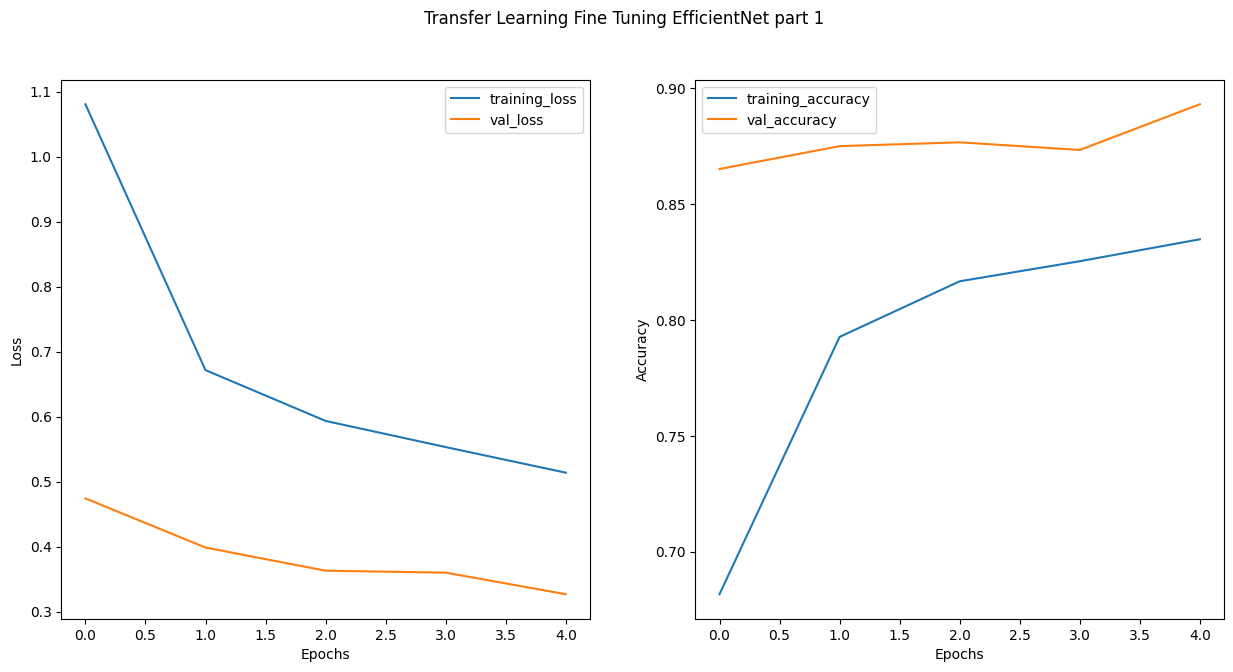

In [ ]:
plot_loss_curves(history_5_part_1, title="Transfer Learning Fine Tuning EfficientNet part 1")

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
len([layer for layer in base_model.layers if layer.trainable])

10

In [ ]:
history_5_part_2 = model_5.fit(train_data_all,
                               epochs = fine_tune_epochs,
                               initial_epoch = history_5_part_1.epoch[-1],
                               steps_per_epoch = len(train_data_all),
                               validation_data = test_data_all,
                               validation_steps = int(0.25 * len(test_data_all)),
                               callbacks = [create_tensorboard_callback("transfer_learning_all_data", "10_percent_fine_tune_last_10_all")])

Saving TensorBoard log files to: transfer_learning_all_data/10_percent_fine_tune_last_10_all/20241111-171007
Epoch 5/10
235/235 [==============================] - 470s 2s/step - loss: 0.5011 - accuracy: 0.8416 - val_loss: 0.2987 - val_accuracy: 0.9046
Epoch 6/10
235/235 [==============================] - 474s 2s/step - loss: 0.4807 - accuracy: 0.8475 - val_loss: 0.3114 - val_accuracy: 0.9013
Epoch 7/10
235/235 [==============================] - 480s 2s/step - loss: 0.4622 - accuracy: 0.8475 - val_loss: 0.3007 - val_accuracy: 0.8964
Epoch 8/10
235/235 [==============================] - 458s 2s/step - loss: 0.4607 - accuracy: 0.8505 - val_loss: 0.2777 - val_accuracy: 0.9128
Epoch 9/10
235/235 [==============================] - 480s 2s/step - loss: 0.4443 - accuracy: 0.8605 - val_loss: 0.3060 - val_accuracy: 0.8997
Epoch 10/10
235/235 [==============================] - 463s 2s/step - loss: 0.4402 - accuracy: 0.8589 - val_loss: 0.3117 - val_accuracy: 0.8931


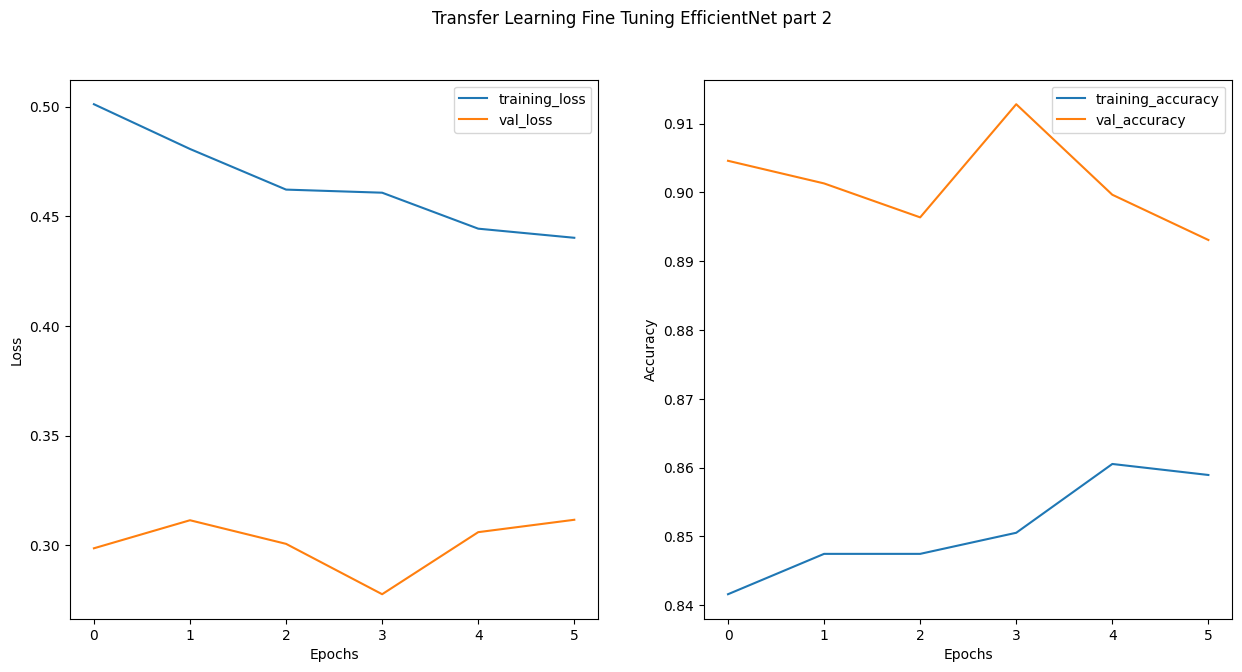

In [ ]:
plot_loss_curves(history_5_part_2, title="Transfer Learning Fine Tuning EfficientNet part 2")

5
11
[0.6815999746322632, 0.7926666736602783, 0.8166666626930237, 0.8253333568572998, 0.8348000049591064, 0.8416000008583069, 0.8474666476249695, 0.8474666476249695, 0.8505333065986633, 0.8605333566665649, 0.8589333295822144]


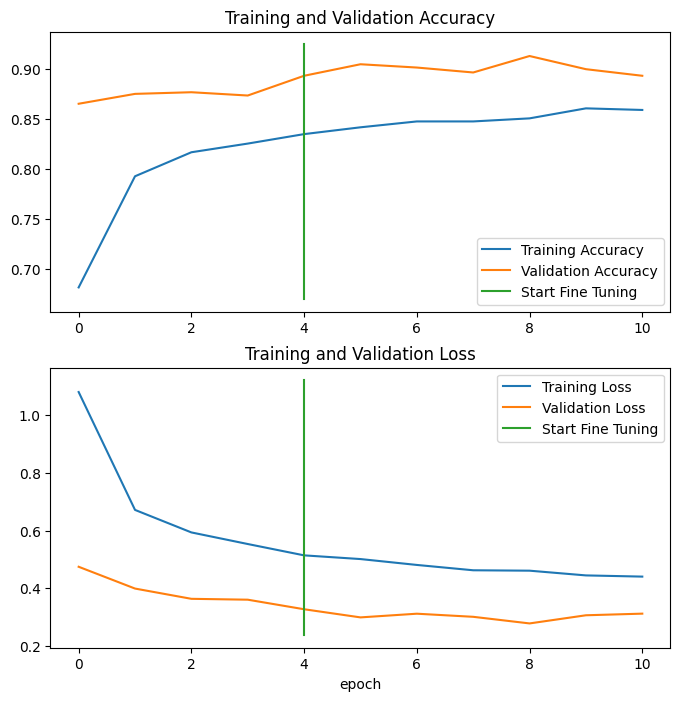

In [ ]:
compare_historys(history_5_part_1, history_5_part_2)